# Question 1

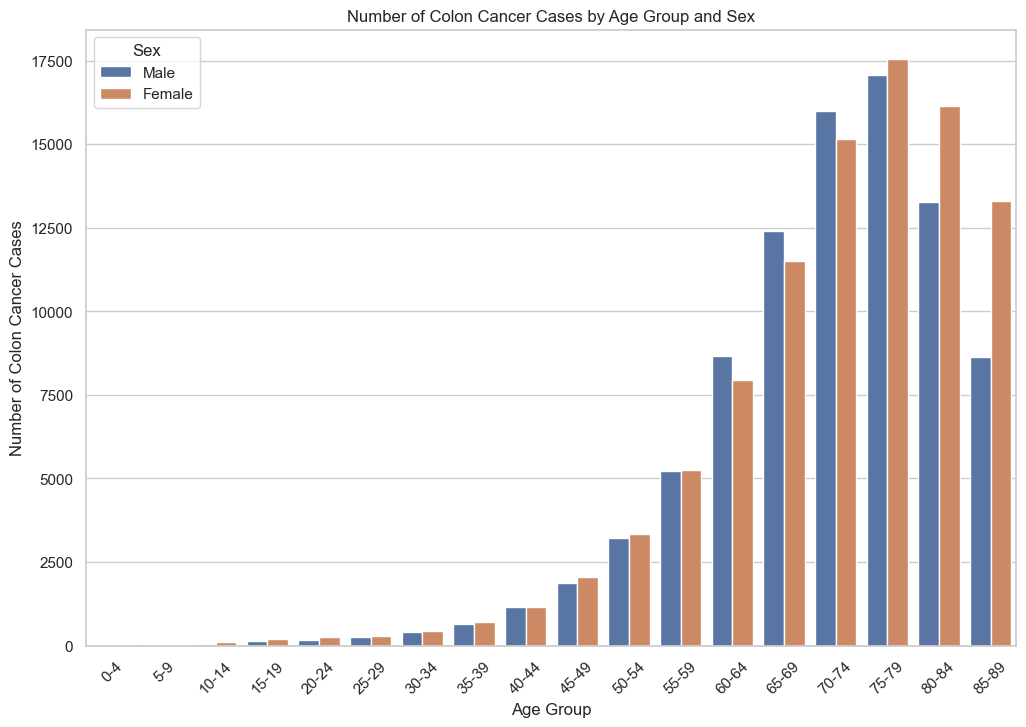

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Load the data
cases_df = pd.read_csv("cases.tsv", sep="\t")
population_df = pd.read_csv("population.tsv", sep="\t")

# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot showing the number of cases by age group and sex
plt.figure(figsize=(12, 8))
sns.barplot(data=cases_df, x="agegroup", y="n", hue="sex", estimator=sum, errorbar=None)

# Add plot labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Colon Cancer Cases")
plt.title("Number of Colon Cancer Cases by Age Group and Sex")
plt.xticks(rotation=45)
plt.legend(title="Sex")

plt.show()

# Question 2

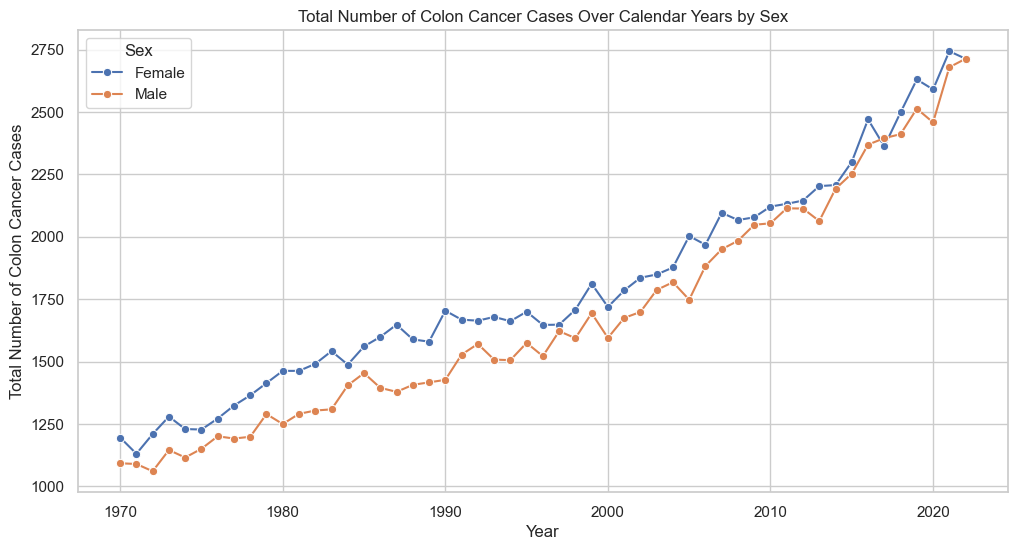

In [4]:
# Calculate the total number of cases per year by sex
total_cases_by_year_sex = cases_df.groupby(['year', 'sex'])['n'].sum().reset_index()

# Create the graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_cases_by_year_sex, x="year", y="n", hue="sex", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Number of Colon Cancer Cases")
plt.title("Total Number of Colon Cancer Cases Over Calendar Years by Sex")
plt.legend(title="Sex")
plt.grid(True)
plt.show()

# Question 3

In [4]:
# Check unique age groups and years
cases_age_groups = set(cases_df['agegroup'].unique())
cases_years = set(cases_df['year'].unique())

population_age_groups = set(population_df['agegroup'].unique())
population_years = set(population_df['year'].unique())

# Compare
age_group_comparison = cases_age_groups == population_age_groups
year_comparison = cases_years == population_years

print("Do age groups match?", age_group_comparison)
print("Do years match?", year_comparison)

Do age groups match? True
Do years match? True


# Question 4

In [6]:
# Merge the data
merged_df = pd.merge(cases_df, population_df, on=['agegroup', 'year', 'sex'], how='inner')

# Summarize total cases and population by year and sex
total_cases_population_df = merged_df.groupby(['year', 'sex']).agg(
    total_cases=('n', 'sum'),
    total_population=('n_pop', 'sum')
).reset_index()

# Output the data frames
print("Merged Data")
print(merged_df.head())

print("\nTotal Cases and Population by Year and Sex")
print(total_cases_population_df)

Merged Data
  agegroup  year   sex  n   n_pop
0      0-4  2022  Male  0  296183
1      5-9  2022  Male  0  319820
2    10-14  2022  Male  1  325003
3    15-19  2022  Male  8  310539
4    20-24  2022  Male  5  310354

Total Cases and Population by Year and Sex
     year     sex  total_cases  total_population
0    1970  Female         1196           4045318
1    1970    Male         1093           4035911
2    1971  Female         1131           4066592
3    1971    Male         1090           4048573
4    1972  Female         1210           4077814
..    ...     ...          ...               ...
101  2020    Male         2458           5222847
102  2021  Female         2743           5191619
103  2021    Male         2679           5260707
104  2022  Female         2713           5223232
105  2022    Male         2713           5298324

[106 rows x 4 columns]


# Question 5

In [11]:

# Add incidence rate to merged data
merged_df['incidence_rate'] = merged_df['n'] / merged_df['n_pop']

# Summarize total cases and population by year and sex
total_cases_population_df = merged_df.groupby(['year', 'sex']).agg(
    total_cases=('n', 'sum'),
    total_population=('n_pop', 'sum')
).reset_index()

# Add incidence rate to total cases and population data
total_cases_population_df['incidence_rate'] = (
    total_cases_population_df['total_cases'] / total_cases_population_df['total_population']
)

# Output the data frames
print("Merged Data with Incidence Rates")
print(merged_df.head())

print("\nTotal Cases and Population with Incidence Rates")
print(total_cases_population_df)

Merged Data with Incidence Rates
  agegroup  year   sex  n   n_pop  incidence_rate
0      0-4  2022  Male  0  296183        0.000000
1      5-9  2022  Male  0  319820        0.000000
2    10-14  2022  Male  1  325003        0.000003
3    15-19  2022  Male  8  310539        0.000026
4    20-24  2022  Male  5  310354        0.000016

Total Cases and Population with Incidence Rates
     year     sex  total_cases  total_population  incidence_rate
0    1970  Female         1196           4045318        0.000296
1    1970    Male         1093           4035911        0.000271
2    1971  Female         1131           4066592        0.000278
3    1971    Male         1090           4048573        0.000269
4    1972  Female         1210           4077814        0.000297
..    ...     ...          ...               ...             ...
101  2020    Male         2458           5222847        0.000471
102  2021  Female         2743           5191619        0.000528
103  2021    Male         2679   

# Question 6

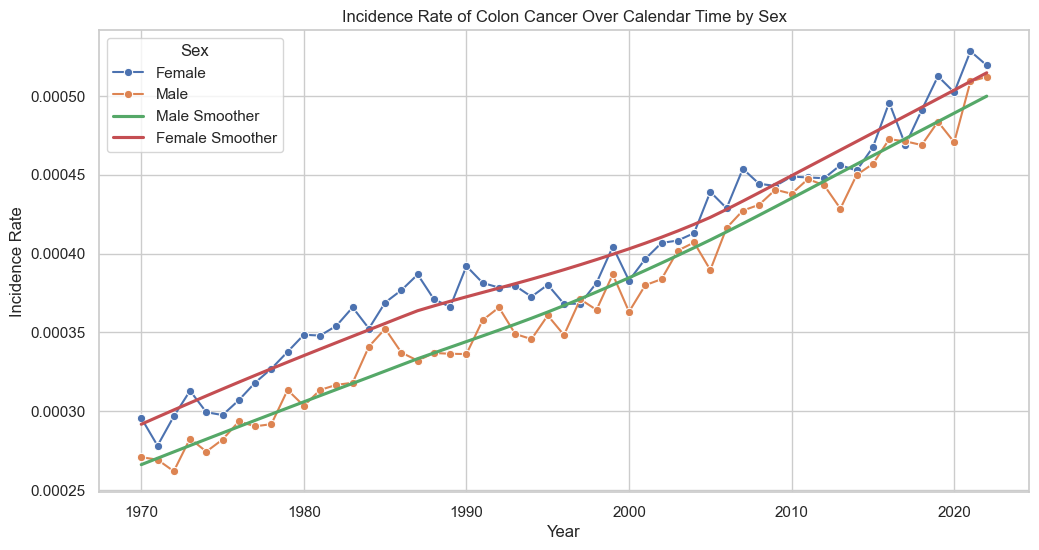

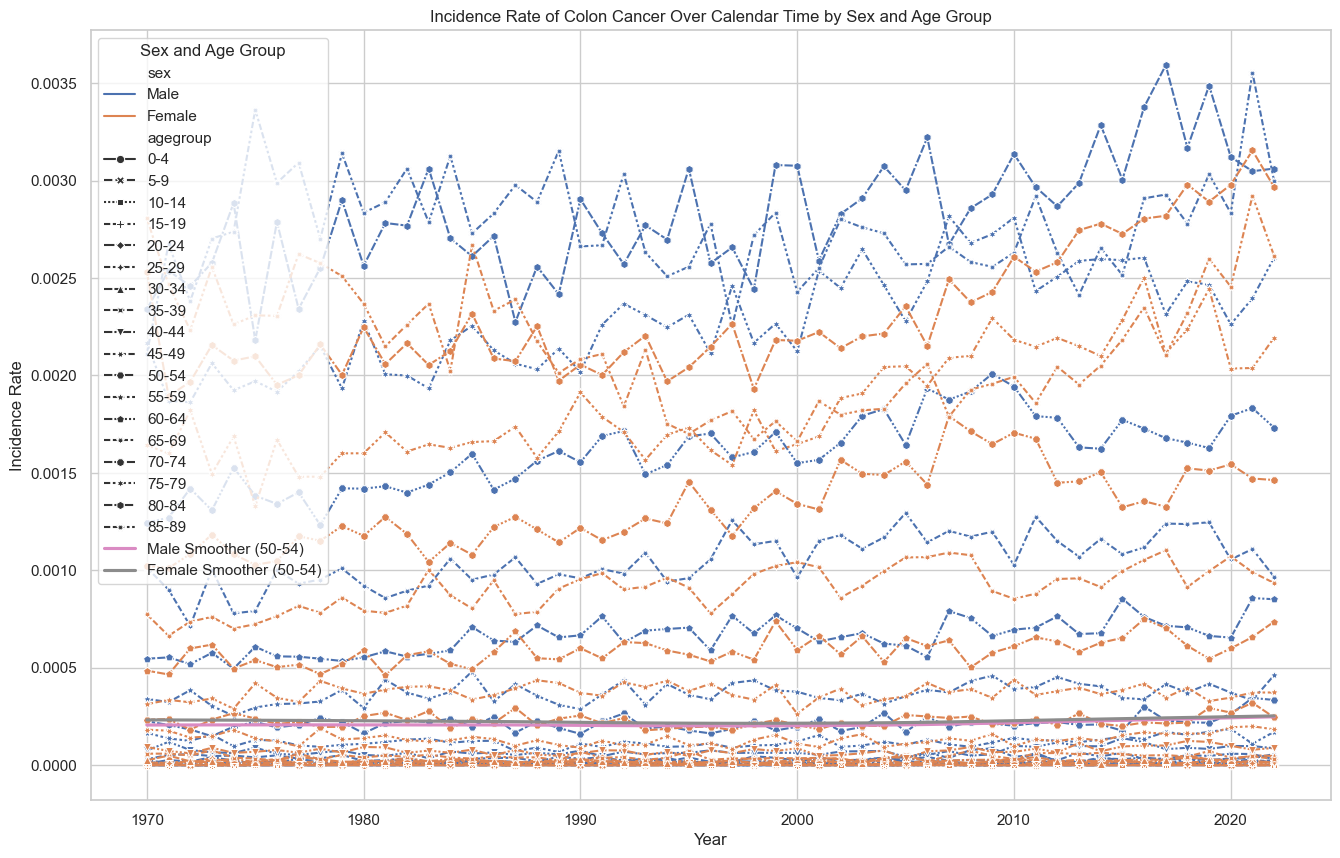

In [12]:
# Plot incidence rate over time with smoothers, separately by males and females
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_cases_population_df, x='year', y='incidence_rate', hue='sex', marker="o")
sns.regplot(
    data=total_cases_population_df[total_cases_population_df['sex'] == 'Male'],
    x='year', y='incidence_rate', scatter=False, lowess=True, label="Male Smoother"
)
sns.regplot(
    data=total_cases_population_df[total_cases_population_df['sex'] == 'Female'],
    x='year', y='incidence_rate', scatter=False, lowess=True, label="Female Smoother"
)
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.title("Incidence Rate of Colon Cancer Over Calendar Time by Sex")
plt.legend(title="Sex")
plt.grid(True)
plt.show()

# Plot incidence rate over time by sex and age group with smoothers
plt.figure(figsize=(16, 10))
sns.lineplot(data=merged_df, x='year', y='incidence_rate', hue='sex', style='agegroup', markers=True)
sns.regplot(
    data=merged_df[(merged_df['sex'] == 'Male') & (merged_df['agegroup'] == '50-54')],
    x='year', y='incidence_rate', scatter=False, lowess=True, label="Male Smoother (50-54)"
)
sns.regplot(
    data=merged_df[(merged_df['sex'] == 'Female') & (merged_df['agegroup'] == '50-54')],
    x='year', y='incidence_rate', scatter=False, lowess=True, label="Female Smoother (50-54)"
)
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.title("Incidence Rate of Colon Cancer Over Calendar Time by Sex and Age Group")
plt.legend(title="Sex and Age Group")
plt.grid(True)
plt.show()


# Question 7

In [18]:
# Ensure 'sex' is a categorical variable
#total_cases_population_df['sex'] = total_cases_population_df['sex'].astype('category')

# Calculate the logarithm of the total population
total_cases_population_df['log_total_population'] = np.log(total_cases_population_df['total_population'])

# Fit the Poisson regression model
poisson_model = smf.glm(
    formula='total_cases ~ year + C(sex)',
    data=total_cases_population_df,
    family=sm.families.Poisson(),
    offset=np.log(total_cases_population_df['total_population'])
).fit()

# Print the model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_cases   No. Observations:                  106
Model:                            GLM   Df Residuals:                      103
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -602.69
Date:                Mon, 18 Nov 2024   Deviance:                       222.81
Time:                        15:58:22   Pearson chi2:                     223.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -29.6942      0.307    -96.

## Model fit check

Quick model check since we're assuming linearity between "year" and the log incidence rate

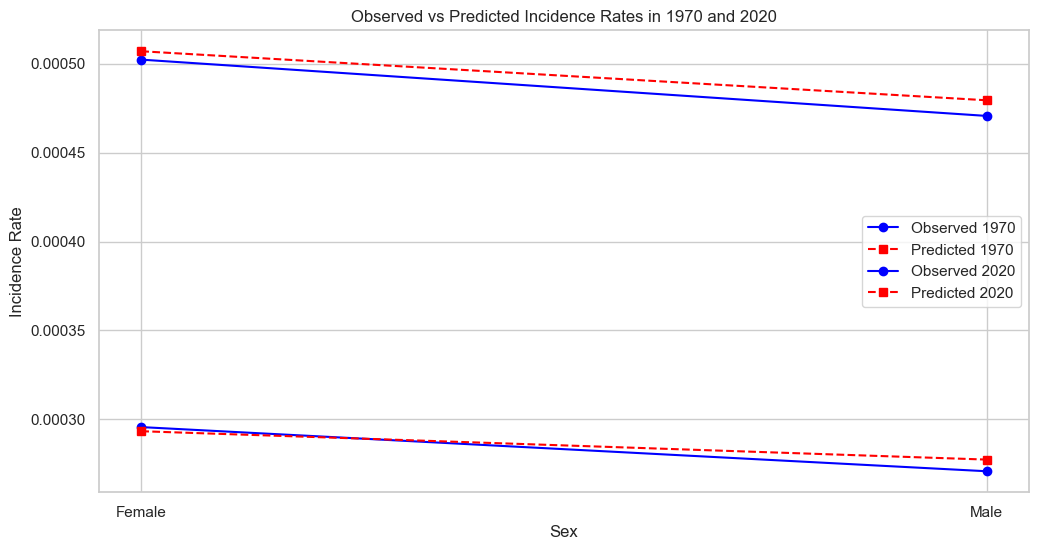

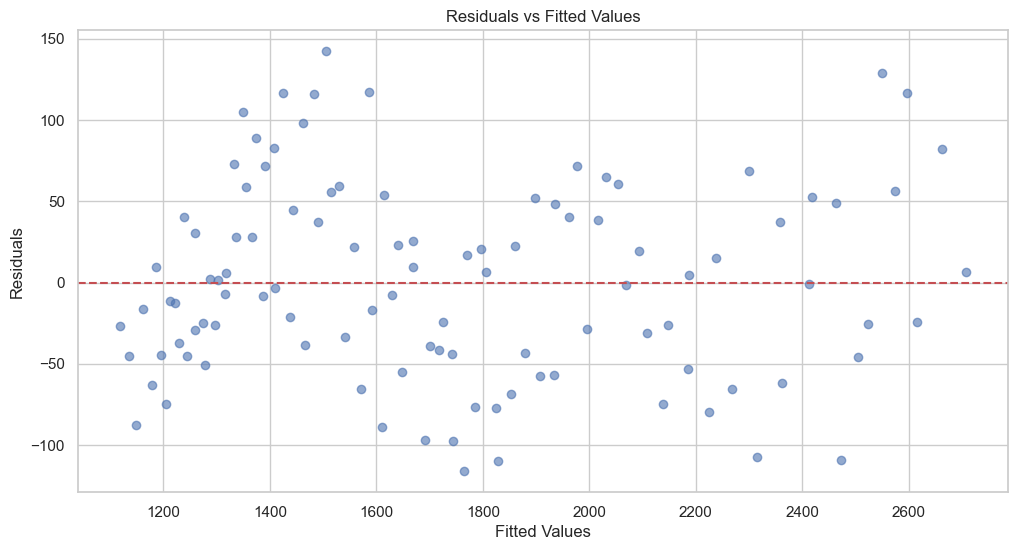

In [16]:
# Predicted vs Observed Incidence Rates
# Get predicted values from the model
predicted_values = poisson_model.fittedvalues

# Create a new column in the dataset for predicted values
total_cases_population_df['predicted_cases'] = predicted_values

# Calculate predicted incidence rates
total_cases_population_df['predicted_incidence_rate'] = total_cases_population_df['predicted_cases'] / total_cases_population_df['total_population']

# Filter for the years 1970 and 2020
years_of_interest = [1970, 2020]
data_filtered = total_cases_population_df[total_cases_population_df['year'].isin(years_of_interest)]

# Plot observed vs predicted incidence rates for 1970 and 2020
plt.figure(figsize=(12, 6))
for year in years_of_interest:
    subset = data_filtered[data_filtered['year'] == year]
    plt.plot(subset['sex'], subset['incidence_rate'], marker='o', linestyle='-', label=f'Observed {year}', color='blue')
    plt.plot(subset['sex'], subset['predicted_incidence_rate'], marker='s', linestyle='--', label=f'Predicted {year}', color='red')

plt.xlabel('Sex')
plt.ylabel('Incidence Rate')
plt.title('Observed vs Predicted Incidence Rates in 1970 and 2020')
plt.legend()
plt.grid(True)
plt.show()

# Residual Analysis
# Calculate residuals
residuals = total_cases_population_df['total_cases'] - total_cases_population_df['predicted_cases']

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# Question 8

In [61]:
# Extract model parameters
params = poisson_model.params

intercept = params['Intercept']
beta_year = params['year']
beta_sex_male = params['C(sex)[T.Male]']  # Difference between males and females

# Compute predicted incidence rates
# For females (reference category)
incidence_rate_female_1970 = np.exp(intercept + beta_year * 1970) * 100000
incidence_rate_female_2020 = np.exp(intercept + beta_year * 2020) * 100000

# For males
incidence_rate_male_1970 = np.exp(intercept + beta_year * 1970 + beta_sex_male) * 100000
incidence_rate_male_2020 = np.exp(intercept + beta_year * 2020 + beta_sex_male) * 100000

# Print the predicted incidence rates
print(f"Predicted incidence rate for females in 1970: {incidence_rate_female_1970}")
print(f"Predicted incidence rate for males in 1970: {incidence_rate_male_1970}")
print(f"Predicted incidence rate for females in 2020: {incidence_rate_female_2020}")
print(f"Predicted incidence rate for males in 2020: {incidence_rate_male_2020}")



Predicted incidence rate for females in 1970: 29.332714895478954
Predicted incidence rate for males in 1970: 27.73750529412747
Predicted incidence rate for females in 2020: 50.6991828283409
Predicted incidence rate for males in 2020: 47.94199436090355


# Testing